In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


**Пункт 1**

In [2]:
df = pd.read_csv('dataset.csv')
df = df[['city', 'target', 'gender', 'education_level', 'major_discipline', 'last_new_job', 'experience', 'relevent_experience']]

Связь переменной target с другими:

1. с переменной gender - женщины с большей вероятностью склонны к смене работы, так как обычно мужчина - основной источник дохода в семье и финансовая опора, это дает женщинам относительную свободу, они имеют больше возможности искать то, что им больше подходит
2. с переменной education_level - чем выше уровень образования, тем меньше люди склонны к смене работы, так как обучение в университете подразумевает получение большого количества знаний в определенной сфере, в которой человек планирует работать в дальнейшем
3. с major_discipline - люди, у которых нет определенной дисциплины, более сконны к изменению работы, так как у них не выбрана сфера развития
4. experience - чем больше опыт работы, тем менее человек склонен к смене работы, так как вероятно уже нашел дело и место, в котором хочет развиваться
5. relevent_experience - если у человека уже есть опыт, который относится к настоящей работе, то он с меньшей вероятностью будет ее менять
6. last_new_job - чем меньше промежуток между прошлой и настоящей работой, тем менее вероятна смена работы 
7. city - довольно сложно на данном этапе предсказать связь между кодом города и сменой работы, потому что сам по себе код не дает информации

In [3]:
df['education_level'].unique() 

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [4]:
df['major_discipline'].unique() 

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [5]:
df['experience'].unique() 

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [6]:
df['relevent_experience'].unique() 

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [7]:
df['last_new_job'].unique() 

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [8]:
df['city'].unique() 

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

**Пункт 2**

Теперь уберем строчки с пропусками в датафрейме

In [9]:
df = df.dropna()
df

,city,target,gender,education_level,major_discipline,last_new_job,experience,relevent_experience
0,city_103,1.0,Male,Graduate,STEM,1,>20,Has relevent experience
1,city_40,0.0,Male,Graduate,STEM,>4,15,No relevent experience
4,city_162,0.0,Male,Masters,STEM,4,>20,Has relevent experience
7,city_46,1.0,Male,Graduate,STEM,>4,13,Has relevent experience
8,city_103,1.0,Male,Graduate,STEM,1,7,Has relevent experience
...,...,...,...,...,...,...,...,...
19150,city_160,0.0,Female,Graduate,STEM,3,10,Has relevent experience
19152,city_103,0.0,Female,Graduate,Humanities,1,7,Has relevent experience
19153,city_173,1.0,Male,Graduate,Humanities,1,14,No relevent experience
19154,city_103,1.0,Male,Graduate,STEM,4,14,Has relevent experience


Таким образом, в выборке осталось 12606 наблюдений.

**Пункт 3**

In [10]:
df_relevant = df[df['relevent_experience'] == 'Has relevent experience']
df_relevant

,city,target,gender,education_level,major_discipline,last_new_job,experience,relevent_experience
0,city_103,1.0,Male,Graduate,STEM,1,>20,Has relevent experience
4,city_162,0.0,Male,Masters,STEM,4,>20,Has relevent experience
7,city_46,1.0,Male,Graduate,STEM,>4,13,Has relevent experience
8,city_103,1.0,Male,Graduate,STEM,1,7,Has relevent experience
11,city_103,0.0,Male,Graduate,STEM,1,5,Has relevent experience
...,...,...,...,...,...,...,...,...
19149,city_103,1.0,Male,Masters,STEM,1,9,Has relevent experience
19150,city_160,0.0,Female,Graduate,STEM,3,10,Has relevent experience
19152,city_103,0.0,Female,Graduate,Humanities,1,7,Has relevent experience
19154,city_103,1.0,Male,Graduate,STEM,4,14,Has relevent experience


In [11]:
print(f'Доля выборки с релевантным опытом работы = {10082/12606}')

Доля выборки с релевантным опытом работы = 0.7997778835475171


**Пункт 4**
Создадим бинарную переменную по релевантному опыту работы

In [12]:
df['relevent_experience_bin'] = np.where(df['relevent_experience'] == 'Has relevent experience', 1, 0)
df

,city,target,gender,education_level,major_discipline,last_new_job,experience,relevent_experience,relevent_experience_bin
0,city_103,1.0,Male,Graduate,STEM,1,>20,Has relevent experience,1
1,city_40,0.0,Male,Graduate,STEM,>4,15,No relevent experience,0
4,city_162,0.0,Male,Masters,STEM,4,>20,Has relevent experience,1
7,city_46,1.0,Male,Graduate,STEM,>4,13,Has relevent experience,1
8,city_103,1.0,Male,Graduate,STEM,1,7,Has relevent experience,1
...,...,...,...,...,...,...,...,...,...
19150,city_160,0.0,Female,Graduate,STEM,3,10,Has relevent experience,1
19152,city_103,0.0,Female,Graduate,Humanities,1,7,Has relevent experience,1
19153,city_173,1.0,Male,Graduate,Humanities,1,14,No relevent experience,0
19154,city_103,1.0,Male,Graduate,STEM,4,14,Has relevent experience,1


Отсортируем данные и найдем квантиль

In [13]:
df['relevent_experience_bin'].sort_values()
q70 = np.percentile(df['relevent_experience_bin'], 70)
print("70-квантиль:", q70)

70-квантиль: 1.0


То есть 70% выборки имеет релевантный опыт работы

**Пункт 5**

Преобразуем все нечисловые переменные в числовые

In [27]:
df['city_num'] = LabelEncoder().fit_transform(df['city'])
df['gender_num'] = LabelEncoder().fit_transform(df['gender'])
df['education_level_num'] = LabelEncoder().fit_transform(df['education_level'])
df['major_discipline_num'] = LabelEncoder().fit_transform(df['major_discipline'])
df['experience_num'] = LabelEncoder().fit_transform(df['experience'])
df['last_new_job_num'] = LabelEncoder().fit_transform(df['last_new_job'])
df

,city,target,gender,education_level,major_discipline,last_new_job,experience,relevent_experience,relevent_experience_bin,city_num,education_level_num,major_discipline_num,experience_num,last_new_job_num,gender_num
0,city_103,1.0,Male,Graduate,STEM,1,>20,Has relevent experience,1,5,0,5,21,0,1
1,city_40,0.0,Male,Graduate,STEM,>4,15,No relevent experience,0,75,0,5,6,4,1
4,city_162,0.0,Male,Masters,STEM,4,>20,Has relevent experience,1,49,1,5,21,3,1
7,city_46,1.0,Male,Graduate,STEM,>4,13,Has relevent experience,1,81,0,5,4,4,1
8,city_103,1.0,Male,Graduate,STEM,1,7,Has relevent experience,1,5,0,5,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19150,city_160,0.0,Female,Graduate,STEM,3,10,Has relevent experience,1,48,0,5,1,2,0
19152,city_103,0.0,Female,Graduate,Humanities,1,7,Has relevent experience,1,5,0,2,17,0,0
19153,city_173,1.0,Male,Graduate,Humanities,1,14,No relevent experience,0,53,0,2,5,0,1
19154,city_103,1.0,Male,Graduate,STEM,4,14,Has relevent experience,1,5,0,5,5,3,1


**Пункт 6**


In [28]:
from sklearn.model_selection import train_test_split

Разделение выборки на обучающую (60%) и тестовую (40%) подвыборки

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12606 entries, 0 to 19155
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     12606 non-null  object 
 1   target                   12606 non-null  float64
 2   gender                   12606 non-null  object 
 3   education_level          12606 non-null  object 
 4   major_discipline         12606 non-null  object 
 5   last_new_job             12606 non-null  object 
 6   experience               12606 non-null  object 
 7   relevent_experience      12606 non-null  object 
 8   relevent_experience_bin  12606 non-null  int64  
 9   city_num                 12606 non-null  int64  
 10  education_level_num      12606 non-null  int64  
 11  major_discipline_num     12606 non-null  int64  
 12  experience_num           12606 non-null  int64  
 13  last_new_job_num         12606 non-null  int64  
 14  gender_num               12

In [37]:
y = df['target']
X = df[['relevent_experience_bin','education_level_num', 'gender_num', 'city_num', 'major_discipline_num', 'experience_num', 'last_new_job_num']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
print(f'В тестовую выборку попало {len(X_test)} наблюдений')
print(f'В выборку для обучения попало {len(X_train)} наблюдений')

В тестовую выборку попало 5043 наблюдений
В выборку для обучения попало 7563 наблюдений


**Пункт 7**

Стандартизация переменных в методе k-ближайших соседей заключается в приведении значений переменных к нормальному расмпределению и единному масштабу. Это требуется из-за того, что метод основан на измерении расстояний между точками данных. Если переменные имеют разные масштабы, то переменные с более широкими диапазонами значений могут оказать большее влияние на расстояния между точками, чем переменные с более узкими диапазонами значений.

Путем стандартизации переменных мы приводим их к среднему значению 0 и стандартному отклонению 1 (или другому желаемому масштабу). Это позволяет корректно сравнивать влияние различных переменных на итоговый результат метода k-NN и предотвращает преувеличение влияния переменных с большими значениями.

Стандартизация перемемнных необходима и в нашем дататсете, так как в нем содератся данные с разным разброс.

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train
X_test

array([[ 0.5027669 ,  1.34573514,  0.26120351, ...,  0.324499  ,
         1.17198259, -0.90645682],
       [ 0.5027669 ,  1.34573514,  0.26120351, ...,  0.324499  ,
         1.17198259, -0.90645682],
       [ 0.5027669 ,  1.34573514,  0.26120351, ...,  0.324499  ,
         0.15219477, -0.90645682],
       ...,
       [ 0.5027669 , -0.60216818,  0.26120351, ...,  0.324499  ,
        -1.74169689, -0.90645682],
       [ 0.5027669 , -0.60216818,  0.26120351, ...,  0.324499  ,
        -0.86759304, -0.35779472],
       [ 0.5027669 ,  1.34573514,  0.26120351, ...,  0.324499  ,
        -0.86759304,  1.83685368]])

**Пункт 8**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [40]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(X_test)

In [41]:
y_pred_knn

array([0., 0., 1., ..., 0., 0., 0.])

**Пункт 9**

In [42]:
from sklearn.metrics import accuracy_score
1 - accuracy_score(y_test, y_pred_knn)

0.25639500297441997

Ошибка (error rate) может быть неинформативной метрикой при оценке качества прогноза, потому что она не учитывает типы ошибок, неоднородность данных, контекст и цену ошибки, а также неустойчивость к несбалансированным данным. Для более полной оценки качества модели следует использовать комплексный набор метрик.

**Пункт 10**

In [43]:
from statsmodels.compat import lzip
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84      3824
         1.0       0.46      0.32      0.37      1219

    accuracy                           0.74      5043
   macro avg       0.63      0.60      0.61      5043
weighted avg       0.72      0.74      0.73      5043



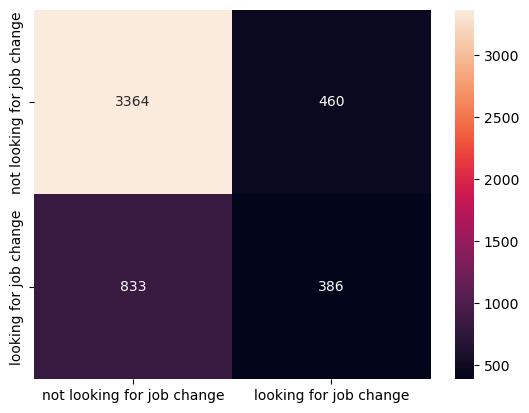

In [44]:
classes_names = ['not looking for job change', 'looking for job change']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_knn), 
                  columns=classes_names, index = classes_names)

sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred_knn))

Итого получилось 833 ложноположительных результата и 460 ложноотрицательных результата.

**Пункт 11**

In [47]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [50]:
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
print(f'Точность (accuracy) = {accuracy}')
print(f'Точность (precision) = {precision}')
print(f'Полнота (recall) = {recall}')

Точность (accuracy) = 0.74360499702558
Точность (precision) = 0.4562647754137116
Полнота (recall) = 0.3166529942575882


Посчитаем эти показатели вручную с помощью формул:

Точность (accuracy) = (TP + TN)/(TP + FP + FN + TN)

Точность (precision) = TP/(TP + FP)

Полнота (recall) = TP/(TP + FN)


In [51]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)

In [54]:
TP = conf_matrix[1][1]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0] 
TN = conf_matrix[0][0] 

accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Точность (Accuracy):", accuracy)
print("Точность (Precision):", precision)
print("Полнота (Recall):", recall)

Точность (Accuracy): 0.74360499702558
Точность (Precision): 0.4562647754137116
Полнота (Recall): 0.3166529942575882


**Пункт 12**

In [61]:
from sklearn.metrics import f1_score
f1s = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    f1s.append(f1_score(y_test, pred_i))
print(f"При количестве соседей, равном {np.array(f1s).argmax()}, достигается лучшее качество прогноза")
print(f"f-статистика для такого количества соседей = {round(max(f1s),3)}")

При количестве соседей, равном 2, достигается лучшее качество прогноза
f-статистика для такого количества соседей = 0.374


**Пункт 13**

Недостатки метода k-ближайших соседей (k-NN):

1. Чувствительность к масштабу: Алгоритм чувствителен к масштабу признаков, поэтому стандартизация данных обычно необходима.
2. Вычислительная сложность: При больших объемах данных и/или большом числе признаков алгоритм может быть вычислительно затратным.
3. Неэффективность с большим числом признаков: При увеличении числа признаков "проклятие размерности" делает пространство более разреженным, что ухудшает производительность k-NN.
4. Неоднозначность выбора оптимального k: Выбор оптимального числа соседей (k) может быть нетривиальным и влияет на качество предсказаний.
5. Отсутствие обучения: Метод k-NN не обучает модель в явном виде, что может быть невыгодно в сравнении с другими алгоритмами.


Слишком большое количество соседей:

Может привести к недостаточной гибкости модели, особенно при сложных данных, и к упрощению гипотезы.

Слишком маленькое количество соседей:

Может делать модель чувствительной к шуму в данных и выбросам, что может привести к переобучению.